In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-leading-causes-of-death/New_York_City_Leading_Causes_of_Death_20240905.csv


# Data Dictionary

This dataframe is called "New York City Leading Causes of Death" and can be found on data.cityofnewyork.com under the health section that is linked on the Scientific Computing website under Lab 2 Links. The dataframe was made public in 2013 and is updated anually. The last time it was updated was December 11, 2023. 


How it was collected and by whom: 
This data was collected and displayed by the Department of Health and Mental Hygiene (DOHMH) of New York City. These were collected by the government when somebody dies because cause of death is mandatory to report.



The columns of the data set include: Year, Leading Cause, Sex, Race, Ethnicity, Deaths, Death Rate, Age, Adjusted Death Rate. 

* Year is an int64 data type that describes what year someone died in

* Leading Cause is an object that describes the Cause of Death of the descendant

* Sex is an object that describes the sex of the descendant

* Race Ethnicity is an object that describes the ethnicity of the descendant

* Deaths was an object converted to a float that describes the number of people who died due to cause of death

* Death Rate was an object converted to a float that describes the death rate within the sex and Race/ethnicity category

* Age Adjusted Death Rate was an object converted to a float that describes the age-adjusted death rate within the sex and Race/ethnicity category



In [2]:
#import plotnine
from plotnine import *

In [3]:
#create a dataframe
df = pd.read_csv("/kaggle/input/new-york-city-leading-causes-of-death/New_York_City_Leading_Causes_of_Death_20240905.csv")

In [4]:
#data types of each column
df.dtypes

Year                        int64
Leading Cause              object
Sex                        object
Race Ethnicity             object
Deaths                     object
Death Rate                 object
Age Adjusted Death Rate    object
dtype: object

In [5]:
df

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,83,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Hispanic,96,8,8.1
2,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,155,12.9,16
3,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1445,122.3,160.7
4,2009,Alzheimer's Disease (G30),F,Asian and Pacific Islander,14,2.5,3.6
...,...,...,...,...,...,...,...
1089,2013,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1868,217.7,258.5
1090,2008,Diabetes Mellitus (E10-E14),M,Hispanic,191,17.3,31.3
1091,2007,Chronic Lower Respiratory Diseases (J40-J47),M,Other Race/ Ethnicity,.,.,.
1092,2008,Chronic Lower Respiratory Diseases (J40-J47),M,Asian and Pacific Islander,46,9.2,16.1


# Analysis

In [6]:
#shape of dataframe
df.shape

(1094, 7)

In [7]:
#drop duplicates in the dataframe to ensure the data is clean and does not repeat itself
df.drop_duplicates(inplace=True)

In [8]:
#change the last 3 columns from objects to floats
#https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
cols = ['Deaths', 'Death Rate', 'Age Adjusted Death Rate']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [9]:
#Look at the the basic summary statistics for the dataframe
df.describe()

,Year,Deaths,Death Rate,Age Adjusted Death Rate
count,1094.000000,956.000000,708.000000,708.000000
mean,2010.477148,444.558577,53.438842,53.462288
std,2.293419,880.107843,76.524700,69.100734
min,2007.000000,5.000000,2.400000,2.500000
25%,2008.000000,36.000000,11.600000,12.150000
50%,2010.000000,148.500000,18.350000,20.350000
75%,2012.000000,307.250000,64.625000,77.550000
max,2014.000000,7050.000000,491.400000,350.700000


In [10]:
#Rename columns for cleanliness
df = df.rename(columns={"Leading Cause":"Leading Cause of Death", "Leading Cause of Death": "Cause of Death",
                       "Race Ethnicity": "Ethnicity"})


In [11]:
#drops any rows that have na or nan as values
df.dropna(inplace=True)
df

,Year,Leading Cause of Death,Sex,Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,83.0,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Hispanic,96.0,8.0,8.1
2,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,155.0,12.9,16.0
3,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1445.0,122.3,160.7
4,2009,Alzheimer's Disease (G30),F,Asian and Pacific Islander,14.0,2.5,3.6
...,...,...,...,...,...,...,...
1088,2010,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,Asian and Pacific Islander,46.0,8.8,8.7
1089,2013,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1868.0,217.7,258.5
1090,2008,Diabetes Mellitus (E10-E14),M,Hispanic,191.0,17.3,31.3
1092,2008,Chronic Lower Respiratory Diseases (J40-J47),M,Asian and Pacific Islander,46.0,9.2,16.1


In [12]:
df["Year"].value_counts()

Year
2007    90
2009    89
2008    89
2011    88
2012    88
2014    88
2013    88
2010    88
Name: count, dtype: int64

In [13]:
#Find the mean of the death rate
df["Death Rate"].mean()

53.4388418079096

In [14]:
#Shows how many of each cause of death are in the data set
df["Leading Cause of Death"].value_counts()

Leading Cause of Death
Influenza (Flu) and Pneumonia (J09-J18)                                                                                              64
Diseases of Heart (I00-I09, I11, I13, I20-I51)                                                                                       64
Cerebrovascular Disease (Stroke: I60-I69)                                                                                            64
Malignant Neoplasms (Cancer: C00-C97)                                                                                                64
Diabetes Mellitus (E10-E14)                                                                                                          64
All Other Causes                                                                                                                     64
Chronic Lower Respiratory Diseases (J40-J47)                                                                                         63
Accidents Except Drug Pos

# Visualizations

# General Graphs about the data as a whole

This graph displays the yearly trend of the top 3 "Leading Cause of Death" in regards to highest Death count in New York City. We can see that the most common Leading Cause of Death is Diseases of the Heart. This is trending downwards, which means the amount of deaths from Heart Disease  NYC is decreasing as time continues. The death count of All Other Causes started strictly increasing, but has now flattened out.

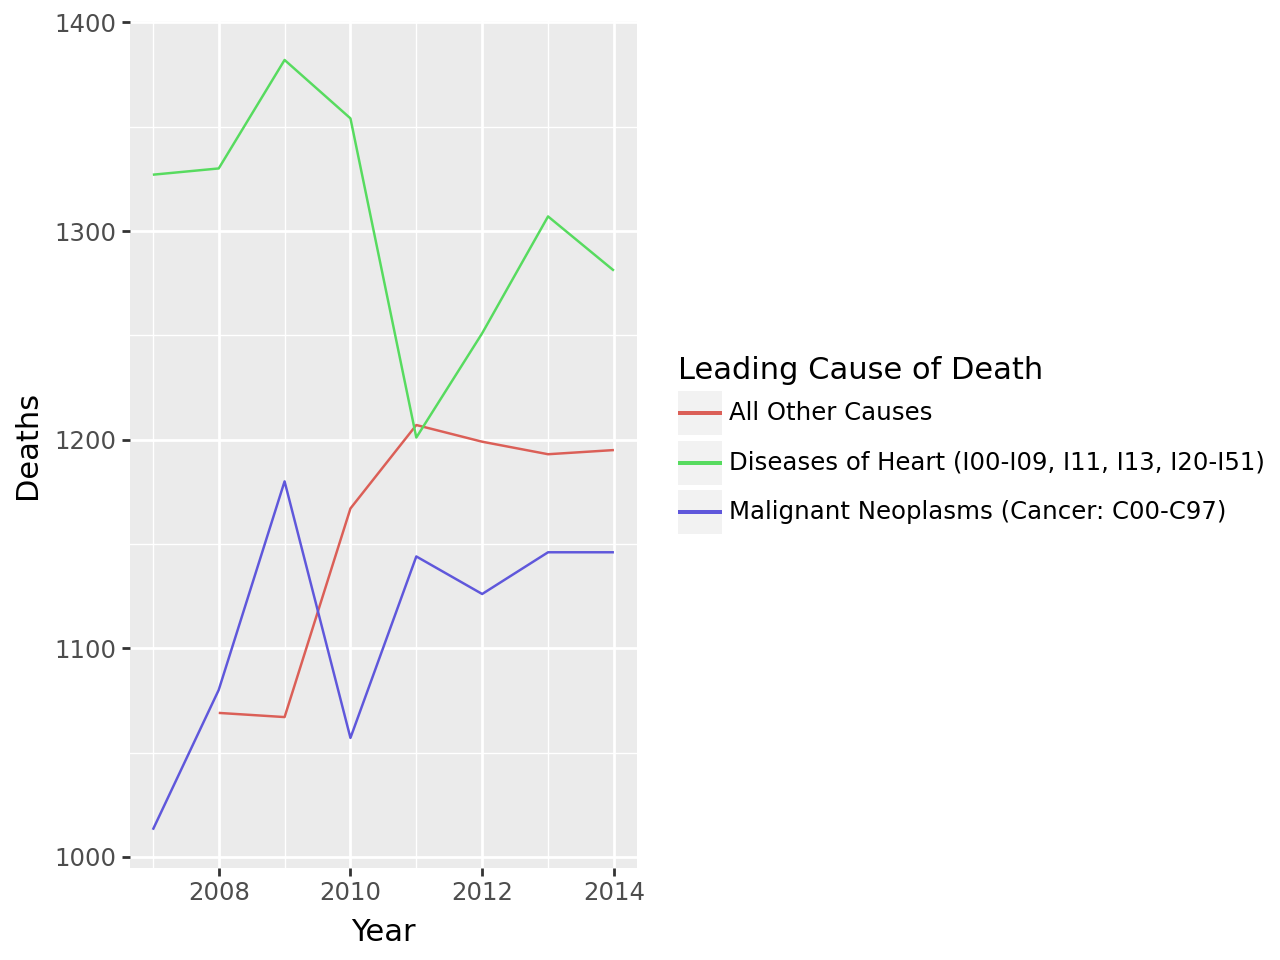

In [15]:
(
    ggplot(df[(df["Ethnicity"]== "Hispanic")& (df["Sex"]=="M") & (df["Deaths"] > 1000)], aes("Year", "Deaths", color="Leading Cause of Death"))
    + geom_line()
    #+ geom_pointdensity()
)

This graph shows the death count for each age adjusted death rate. The age adjusted death rate represents a specific age group in a population compared to a standardized age distribution. So, we see in the graph the death count of various age groups, seeing that deaths increase as the age adjusted death rate increases.

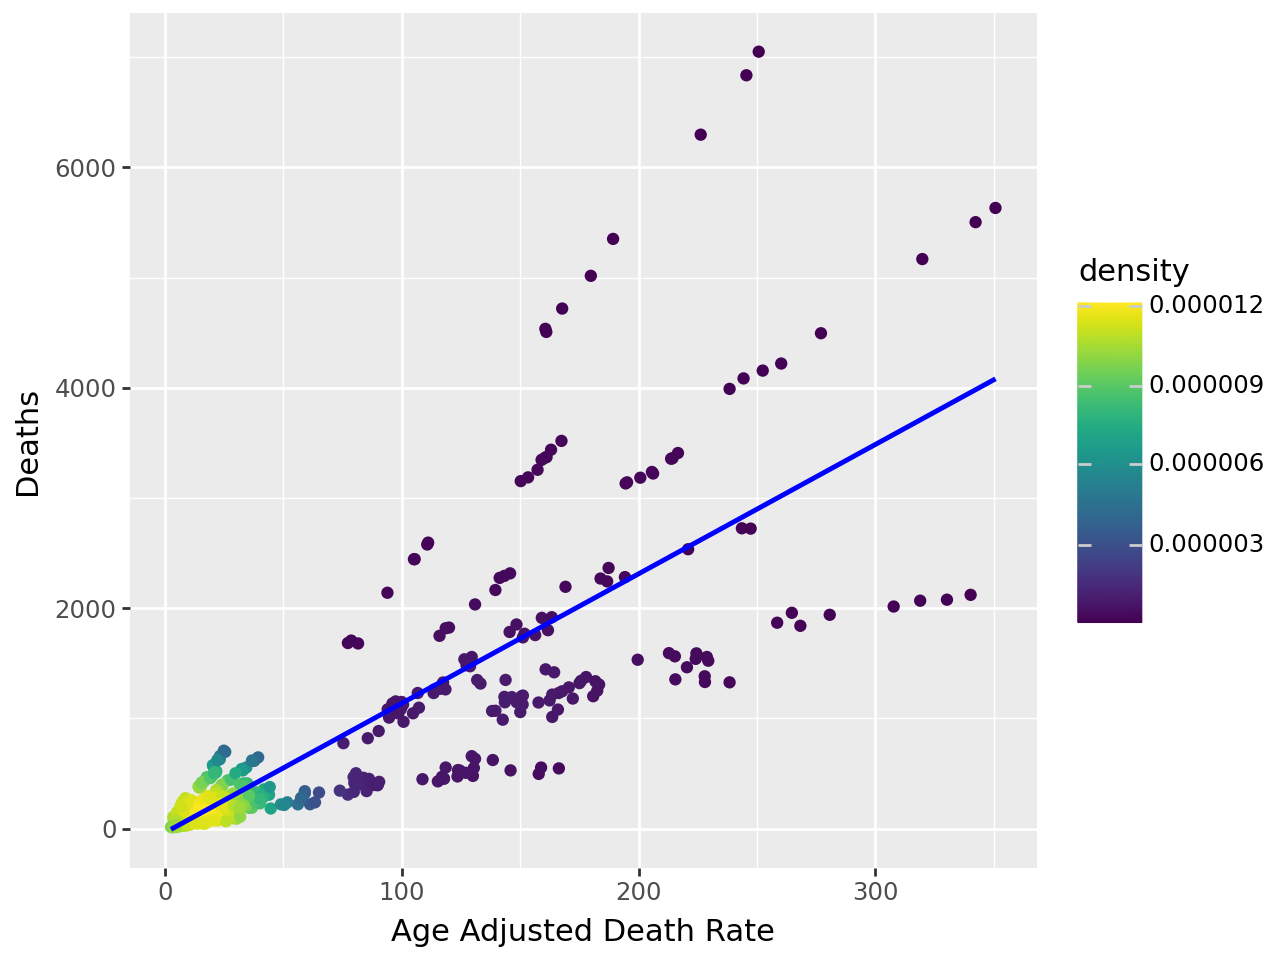

In [16]:
(
    ggplot(df, aes("Age Adjusted Death Rate", "Deaths"))
    + geom_pointdensity()
    + geom_smooth(method='lm', se=False, color='blue')
)

In this graph, we show the number of individuals in death rates of various ethnic groups. This graph shows the high number of Asian and Pacific Islanders with low death rates, and that at higher death rates White Non-Hispanics and Black Non-Hispanic groups have a presence while other groups do not. At the highest death rates, there is only a record of White Non-Hispanics.

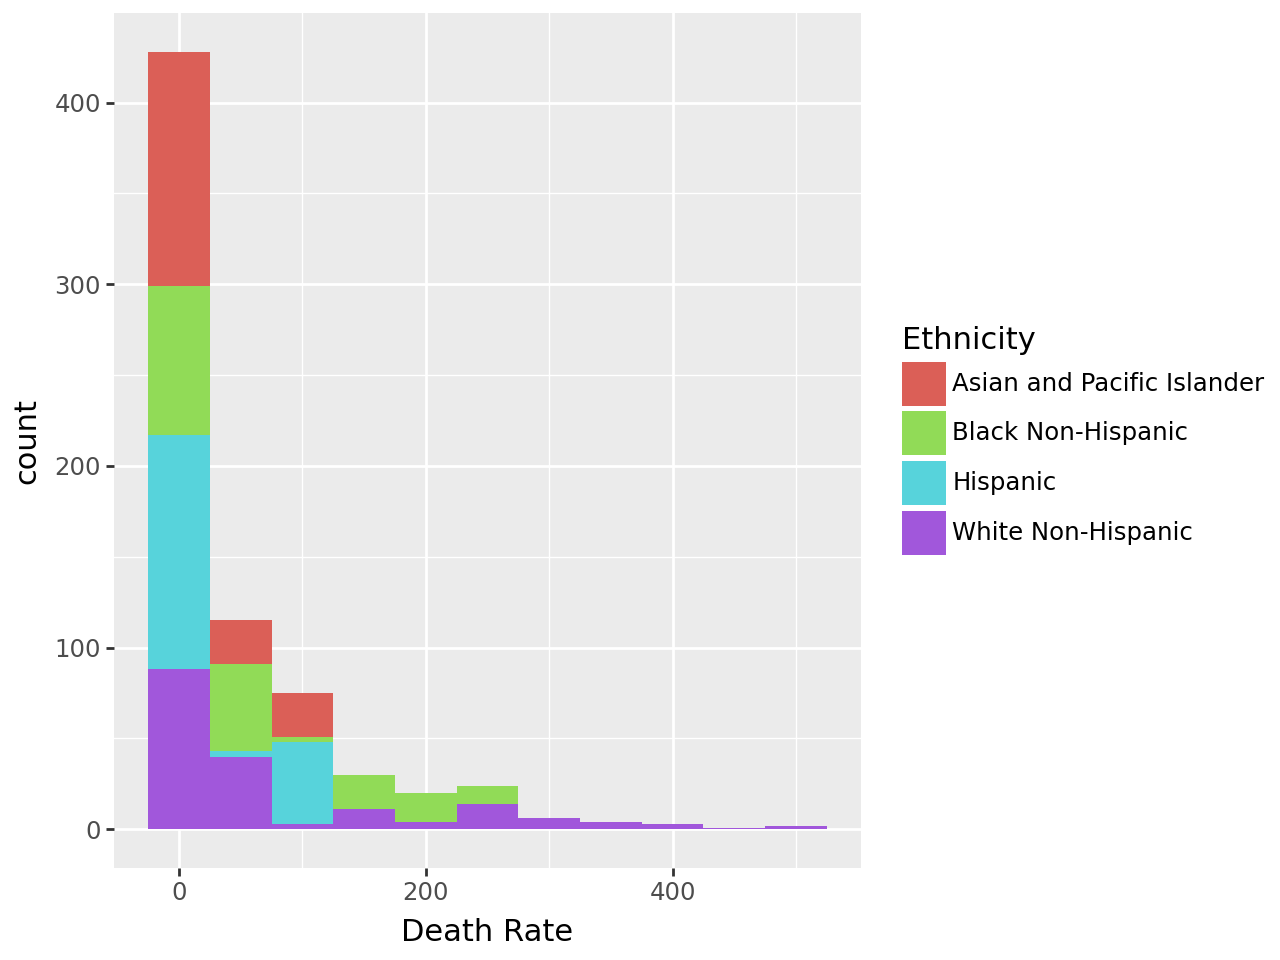

In [17]:
(
    ggplot(df, aes("Death Rate", fill="Ethnicity")) + 
    geom_histogram(binwidth=50)
)

This boxplot displays an alternate view of ethicities and their death rates, showing more clearly the higher level of death rates in some groups. Asian and Pacific Islander have the smalest death rate, while White and Black Non-Hispanic groups have higher rates. 

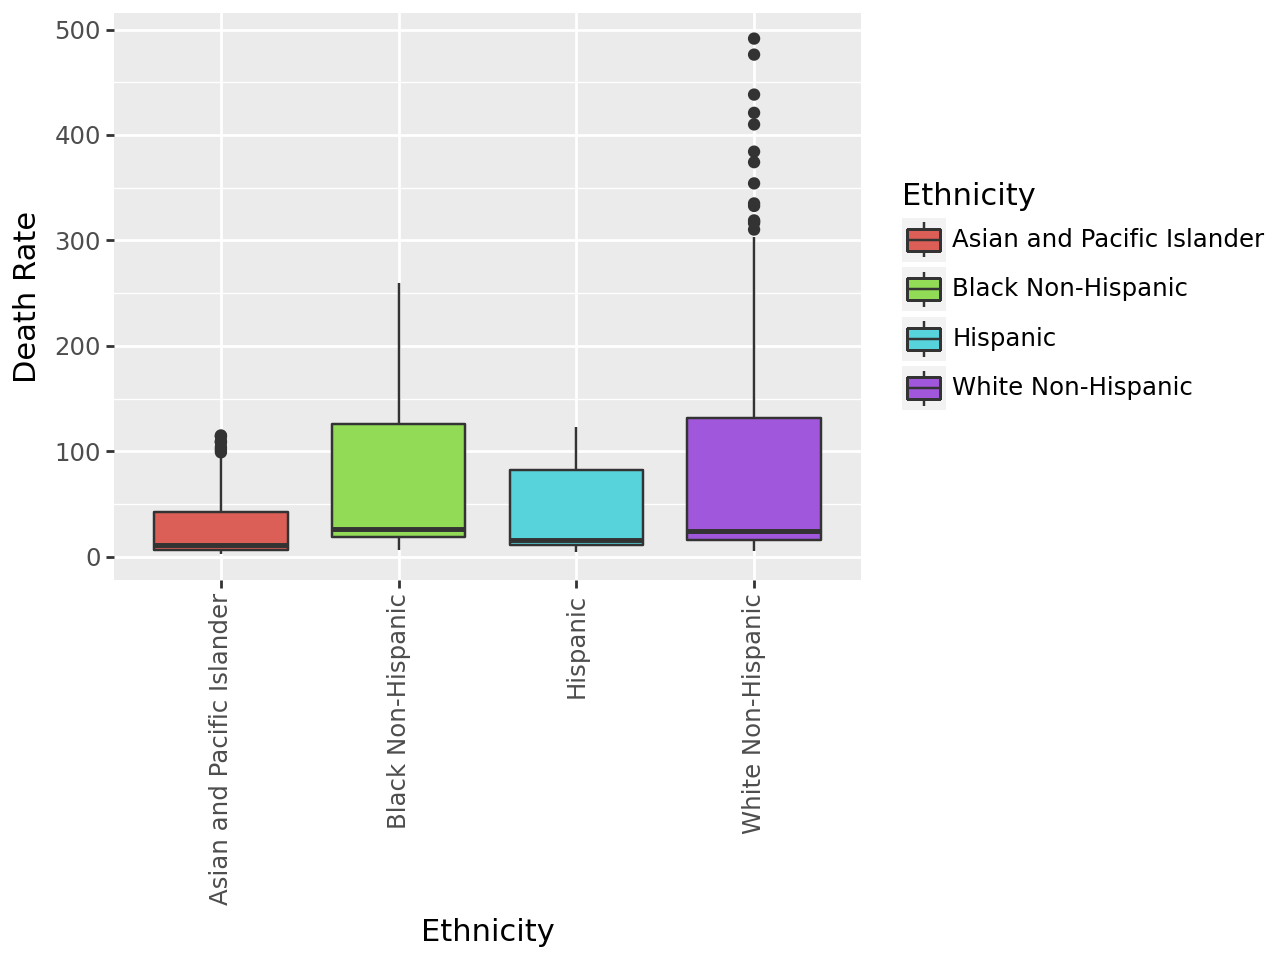

In [18]:
(
    ggplot(df, aes(x="Ethnicity", y="Death Rate", fill="Ethnicity"))
    + geom_boxplot()
    + theme(axis_text_x = element_text(angle = 90))
)


The plot displays a violin plot of the Age Adjusted Death Rates compared to Ethnicity for each sex. We can see that men have a higher Age Adjusted Death Rate than Women. Asian and Pacific Islander has the smallest number of age adjustion and deaths, followed by Hispanic which also has a lower range of ages and a smaller number of deaths. 

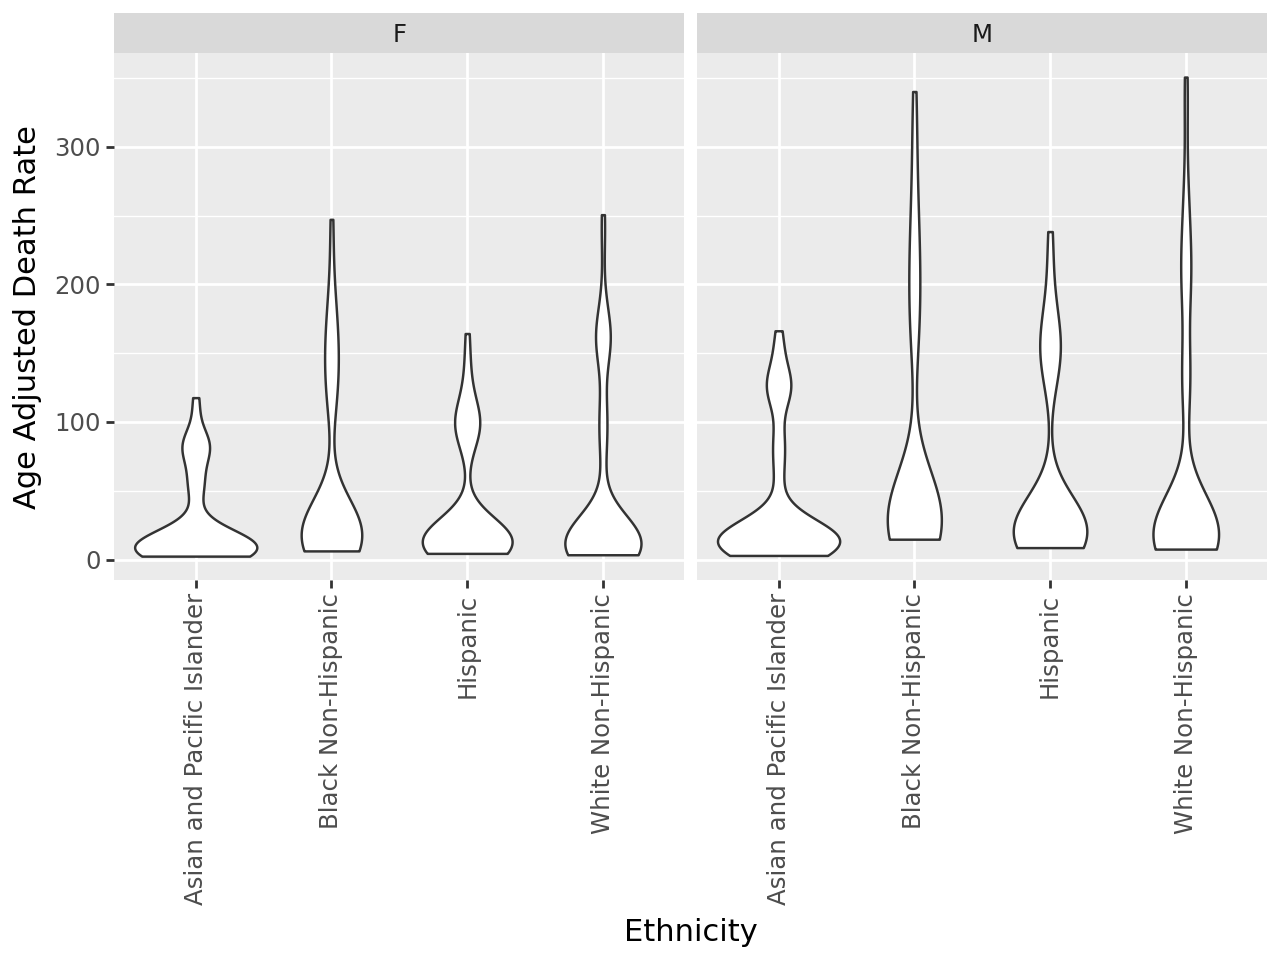

In [19]:
(
    ggplot(df, aes(x="Ethnicity", y="Age Adjusted Death Rate")) 
    + geom_violin() 
    + facet_wrap("Sex")
    + theme(axis_text_x = element_text(angle = 90))
)

This Bar chart of the data looks at the count of the Sexes and Ethnicities and shows that the dataframe has been filtered down. All of the categorical data (Ethnicity and Sex) has an equivalent ratio to each other to ensure diversity in the data set. The owner of the data set chose to only include a perfect numerical equivalency for both Sex and Ethnicity.

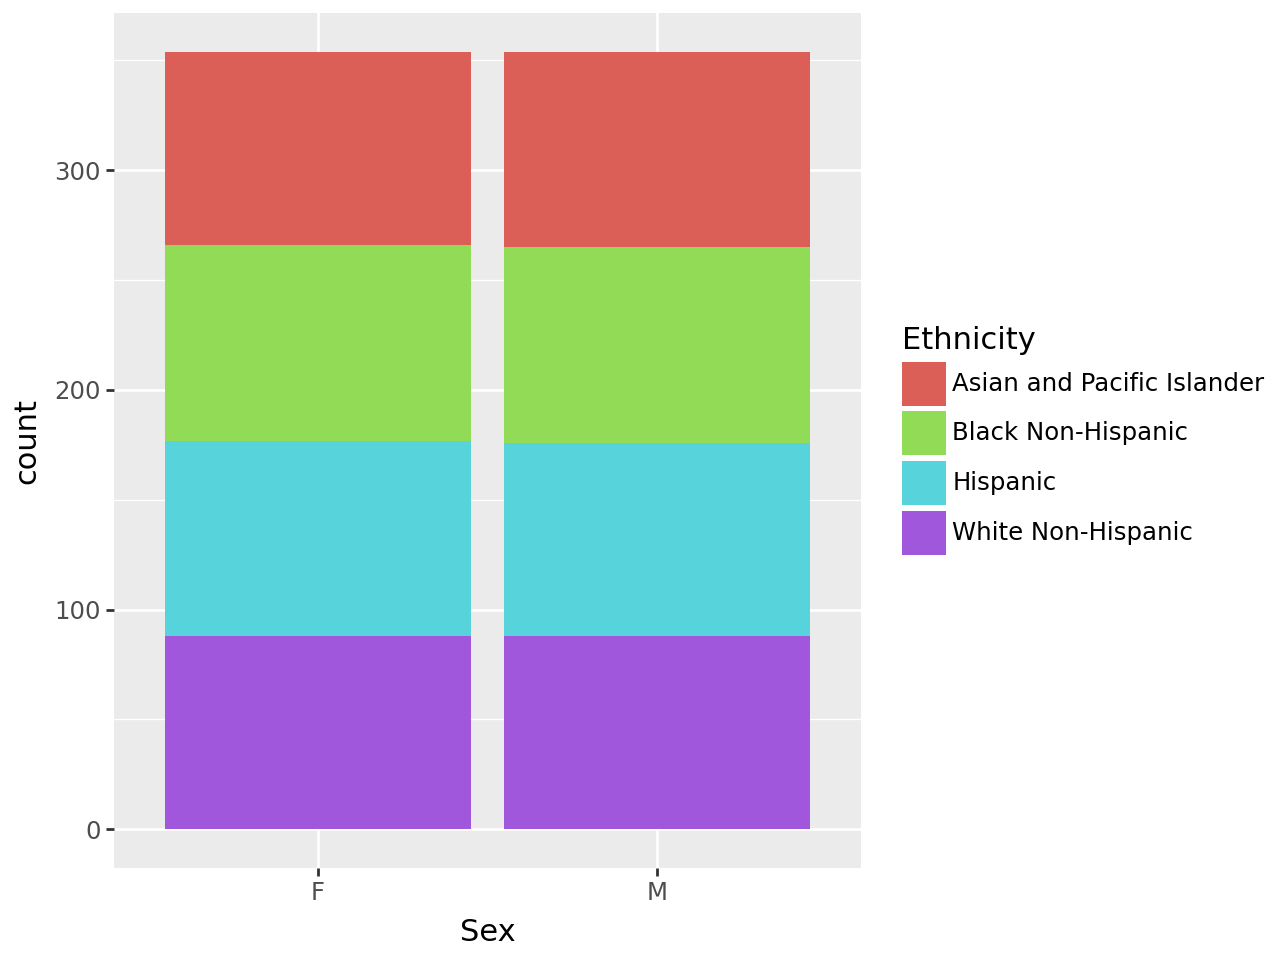

In [20]:
(
    ggplot(df)
    + geom_bar(aes(x="Sex", fill="Ethnicity"))
    #+ facet_wrap("Sex")
)

# Data For Hispanic Men who died from Heart Disease (Create 3 graphs for this)

In [21]:
heart = df[(df["Ethnicity"]== "Hispanic")& (df["Leading Cause of Death"]== "Diseases of Heart (I00-I09, I11, I13, I20-I51)") & (df["Sex"]== "M")]
heart

,Year,Leading Cause of Death,Sex,Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
181,2012,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1251.0,107.1,182.5
568,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1330.0,120.3,228.0
656,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382.0,123.1,227.9
711,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1201.0,104.2,180.8
894,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1354.0,118.5,215.5
913,2007,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1327.0,121.7,238.4
975,2013,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1307.0,110.7,183.3
1082,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1281.0,107.3,170.5


As we can see in the data below, for male hispanics who died from diseases of heart, the death rate has declined through the years. Although there is some variability shown in the points, the line reveals a general decline.  

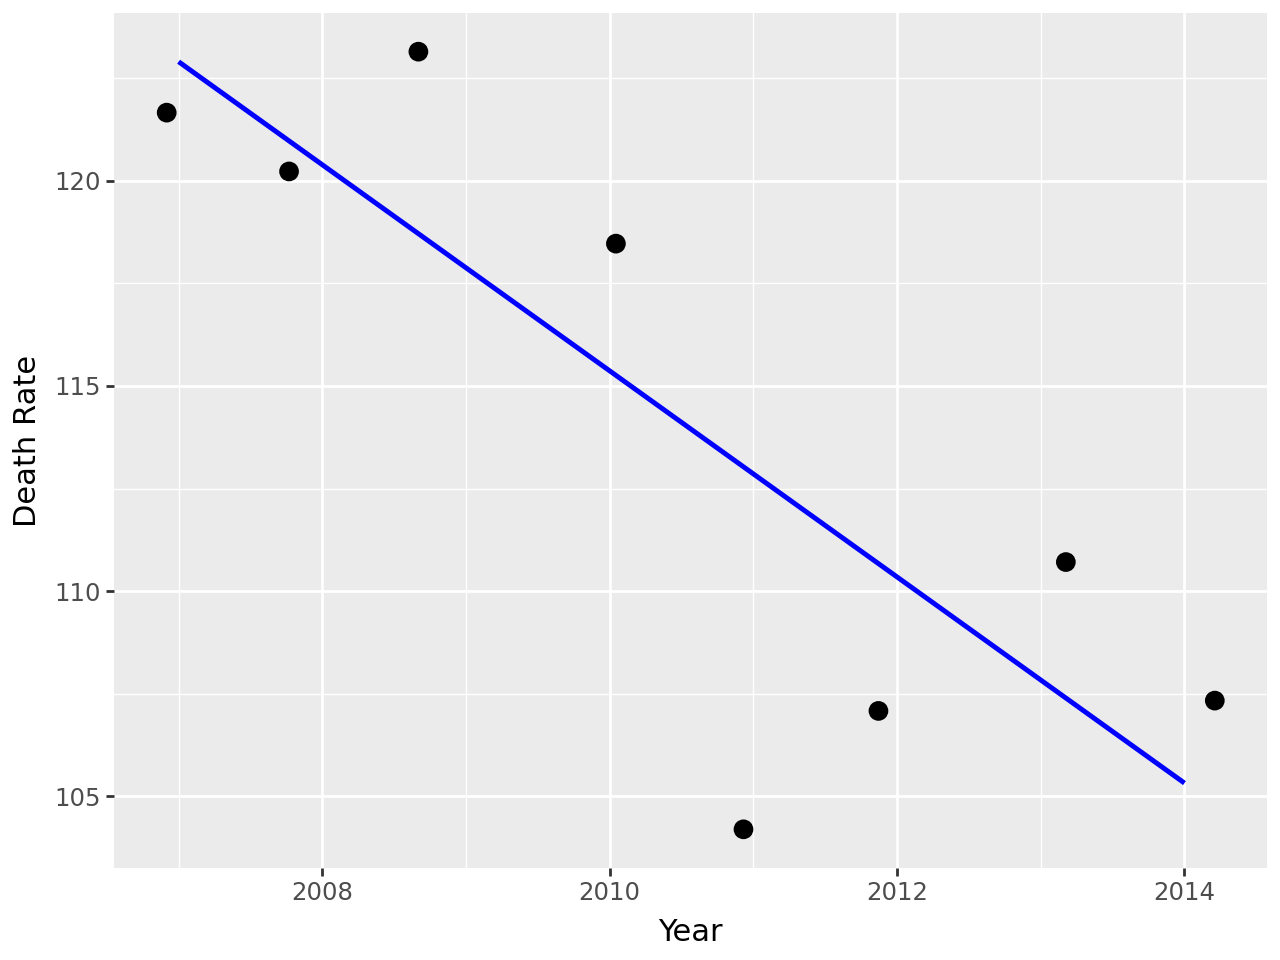

In [22]:
(
    ggplot(heart, aes(x="Year", y="Death Rate"))
    + geom_jitter(size=3)
    + geom_smooth(method='lm', se=False, color='blue')
)

This graph displaying points and lines reveals, for hispanic males who die of heart disease, the changes of the age adjusted death rate from 2007 to 2014. The lines are interesting here, showing a dramatic change in age adjustion from 2010 to 2011.  Overall, the age adjusted death rate has decreased consistently over the years. 

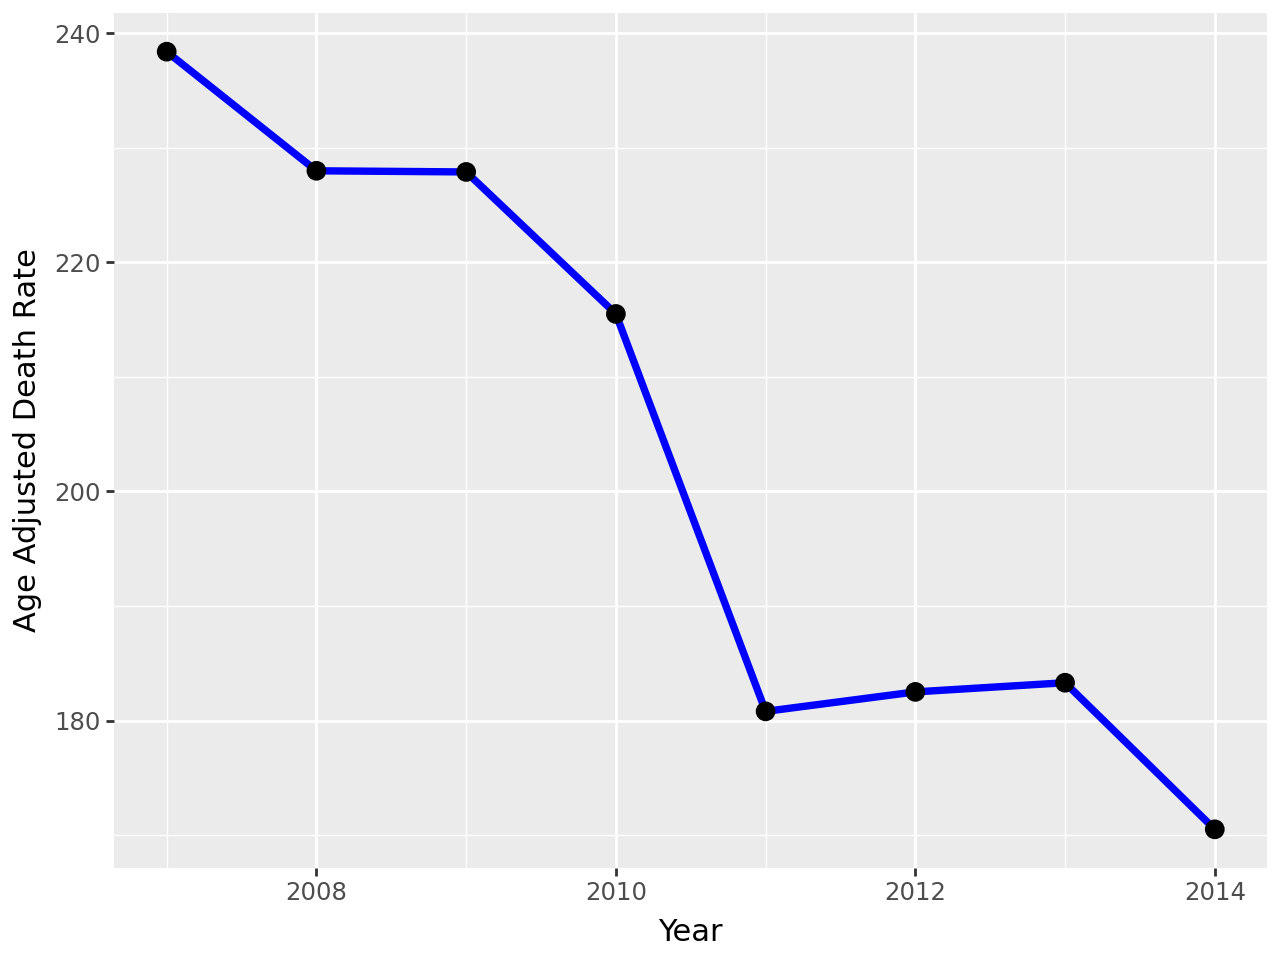

In [23]:
(
    ggplot(heart, aes(x="Year", y="Age Adjusted Death Rate"))
    + geom_line(color="blue", size=1.5)
    + geom_point(size=3)
)

This graph shows the number of deaths per year of male hispanics who die from heart issues, which remains relatively consistent, although there is a smaller number in 2011, and slightly smaller numbers from then until 2014. 

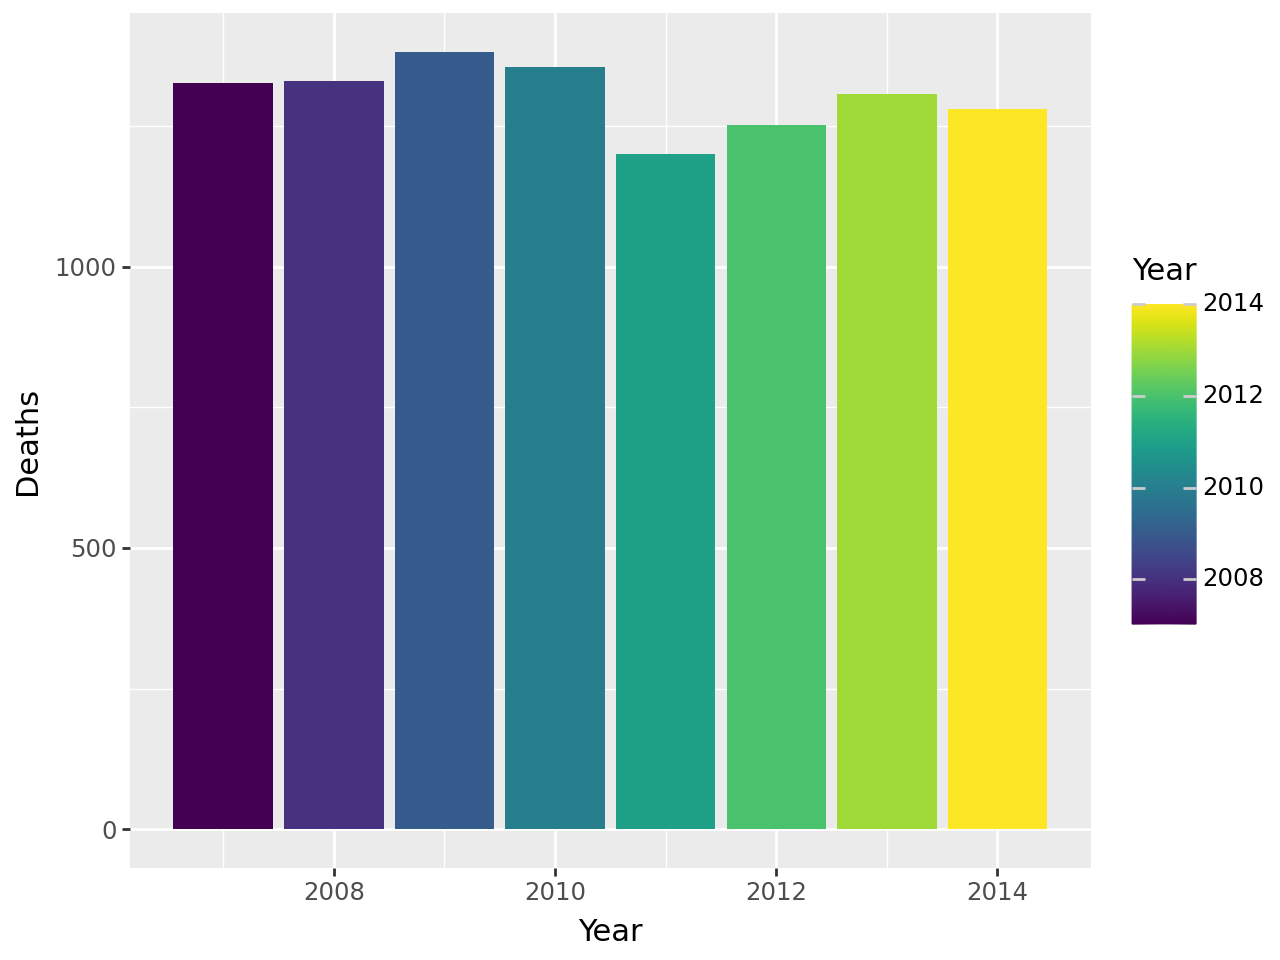

In [24]:
(
    ggplot(heart, aes(x="Year", y="Deaths", fill="Year"))
    + geom_bar(stat="identity")
)

This point and line graph reveals the relationship for male hispanics who died from heart issues between Death Rates and Age Adjusted Death Rates. As the Death Dates increase, so does the Age Adjusted Death Rates. Something interesting about this graph is there is not much moderation, just high levels of Death Rates corresponding with high levels of Age Adjusted Death Rates, and its alternative low rates.

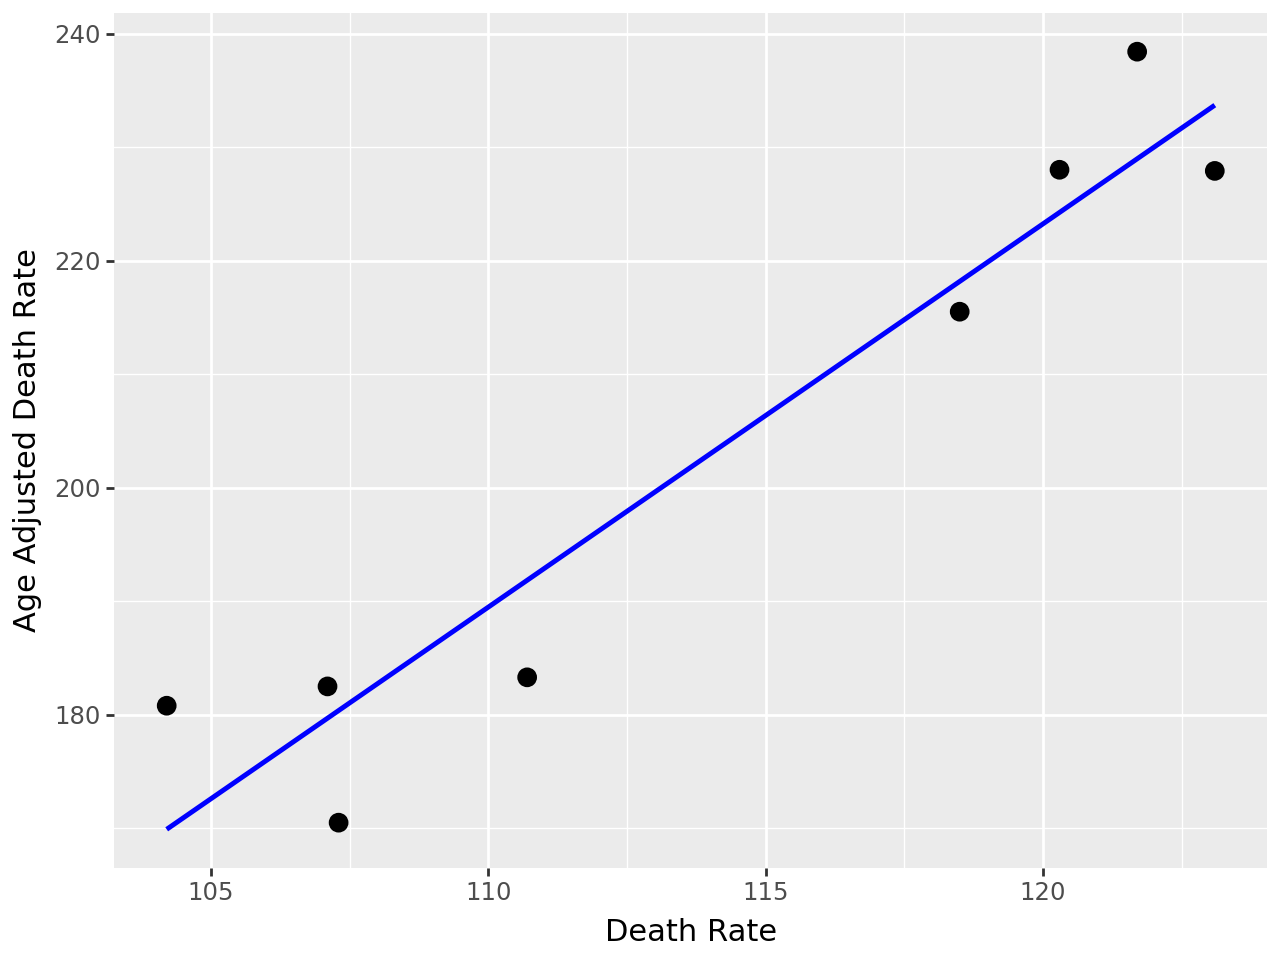

In [25]:
(
    ggplot(heart, aes(x="Death Rate", y="Age Adjusted Death Rate"))
    + geom_point(size=3)
    + geom_smooth(method='lm', se=False, color='blue')
    
)

# Data For Some other Demographic (3 graphs)

In [26]:
women = df[(df["Sex"]== "F") & (df["Ethnicity"]== "Black Non-Hispanic")& (df["Leading Cause of Death"]== "Alzheimer's Disease (G30)")]
#df[(df["Ethnicity"]== "Hispanic")& (df["Leading Cause of Death"]==
women

,Year,Leading Cause of Death,Sex,Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
66,2014,Alzheimer's Disease (G30),F,Black Non-Hispanic,123.0,11.7,9.2
182,2010,Alzheimer's Disease (G30),F,Black Non-Hispanic,88.0,8.4,7.3
561,2012,Alzheimer's Disease (G30),F,Black Non-Hispanic,115.0,11.0,8.9
753,2011,Alzheimer's Disease (G30),F,Black Non-Hispanic,90.0,8.6,7.4
845,2009,Alzheimer's Disease (G30),F,Black Non-Hispanic,79.0,7.5,6.8
901,2013,Alzheimer's Disease (G30),F,Black Non-Hispanic,106.0,10.1,8.0


This graph shows the relationship of Death to Death Rates for Black Non-Hispanic women with Alzheimers. As Deaths increase, so do Death rates. This relationship is strong and can be used to accurately depict Death Rates or Deaths based on one of the groups, as shown by the line intersecting in most points or being very slightly off. 

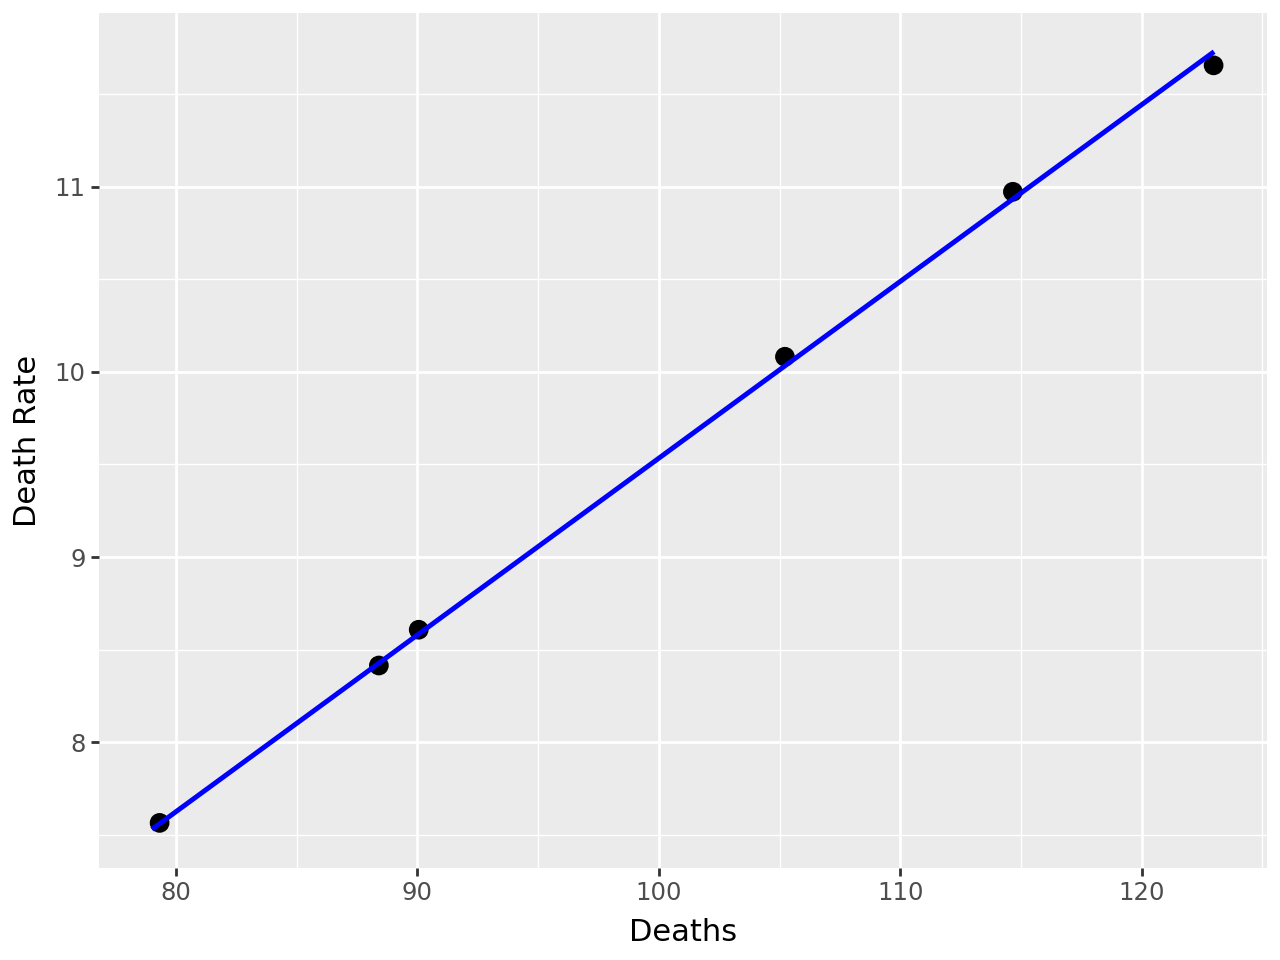

In [27]:
(
    ggplot(women, aes(x="Deaths", y="Death Rate"))
    + geom_jitter(size=3)
    + geom_smooth(method='lm', se=False, color='blue')
)

This graph with lines and points shows for Black Non-Hispanic women with Alzheimers the relationship between the year and the age adjusted death rate. There is a general increase of age adjusted death rate as the years progress, with a noticible increase from 2011 to 2012. 

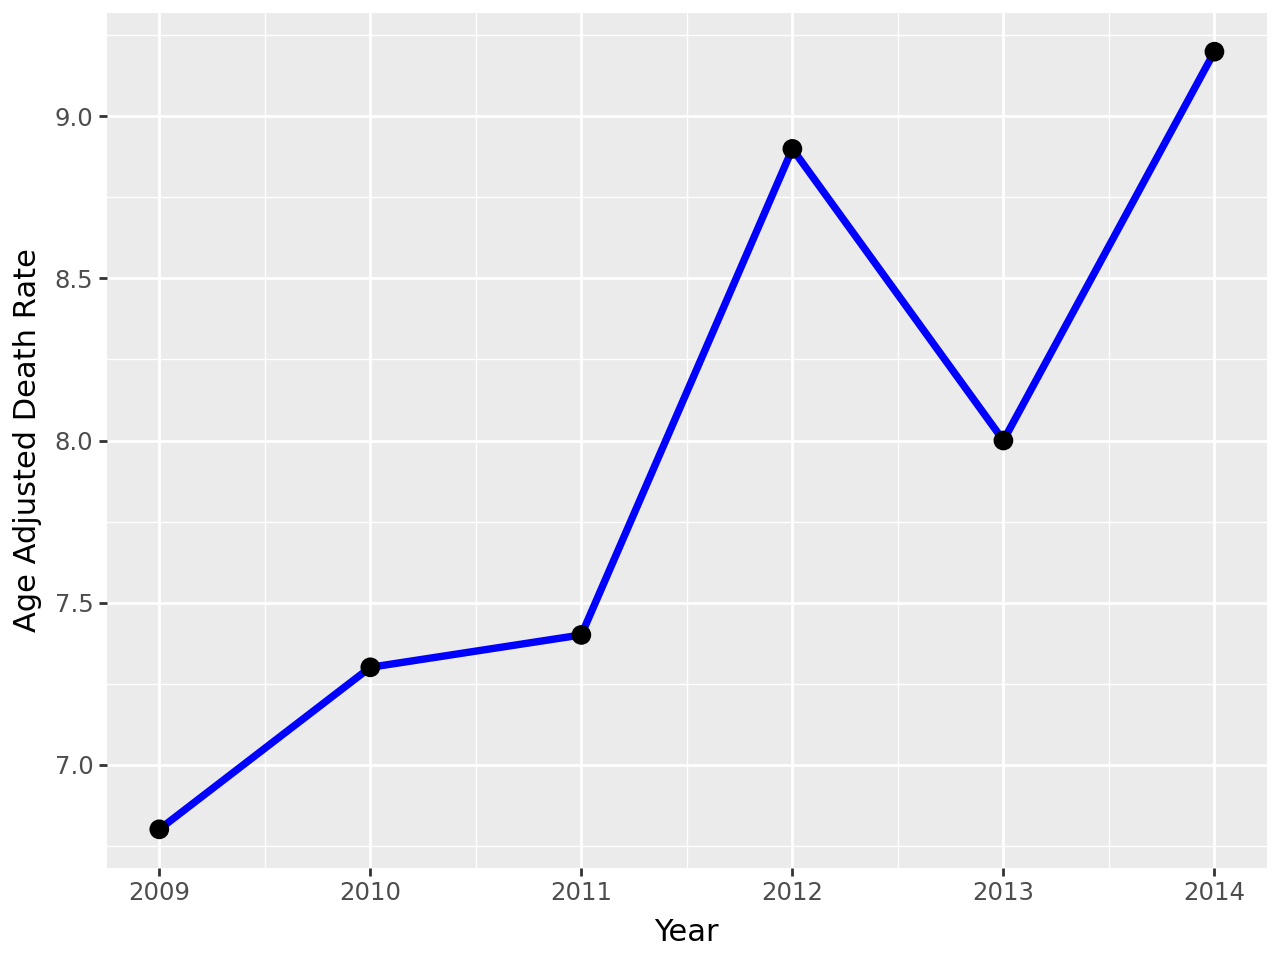

In [28]:
(
    ggplot(women, aes(x="Year", y="Age Adjusted Death Rate"))
    + geom_line(color="blue", size=1.5)
    + geom_point(size=3)
)

This graph displays how many black women who have alzheimers die per year from 2009-2014. As you can see from the bar graph, there is a slight upward trend on how many black women who have alzheimers die per year. This means that more black women are dying  

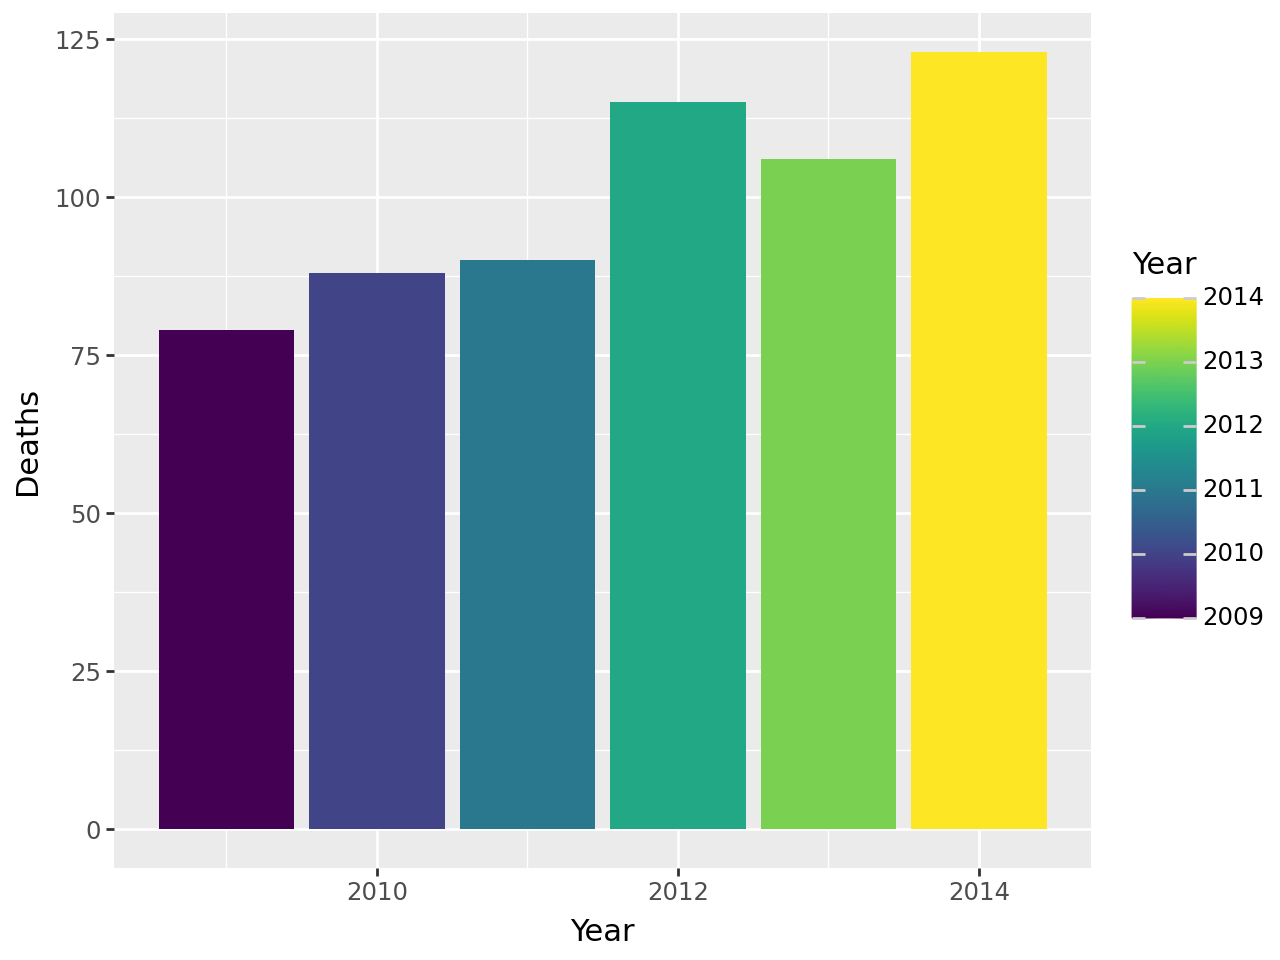

In [29]:
(
    ggplot(women, aes(x="Year", y="Deaths", fill="Year"))
    + geom_bar(stat="identity")
)

# Summary

Overall, the raw data was very overwhelming, but still manageable. The data had already been filtered pretty severely because the ratio of men:women was 1:1, ratio of all 4 ethnicities displayed was 1:1:1:1. After I conducted analysis and visualizations on the original data set, I had to break the original data frame into 2 smaller sub-data frames to get more insight about specific demographic groups. My two sub-data frames were: hispanic men who have heart disease, and black women who have alzheimers. From this project, we learned that finding a data set is very difficult and then you need to manipulate the data fairly heavily in order to gain meaningful insight from the data. Some major take aways include: heart disease is the most common form of death in NYC, the death rate of heart disease is decreasing for hispanic men in NYC, and the death count from Alzheimers is increasing for black women in NYC.